In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

In [ ]:
def generate_data():
  """ Make mock data, both for training and test data set. """

  # Set seed number for reproduceability
  # With seed number set, "random" numbers are the same for every run
  random.seed(0)

  # Make data array for x
  # np.linspace gives uniformly spaced values
  x_data = np.linspace(0.0, 5.0, num=26)
  
  # Set parameters for polynomial (order 3)
  # This is the same as y = 0.05 x^3 - 0.5 x^2 + 1.3 x + 1.0
  # np.poly1d takes coefficient, and give a polynomial "function" p
  # that will return value of y for input x for this polynomial
  z = np.array([0.05, -0.5, 1.3, 1.0])
  p = np.poly1d(z)

  # Make data arrays for y (training & test)
  # Both are the same underlying polynomial, but with different noise
  # Noises are generated by SND, scaled down to adjust the spread
  y_perfect = p(x_data)
  noise1 = random.randn(26) * 0.15
  noise2 = random.randn(26) * 0.15
  y_train = y_perfect + noise1
  y_test = y_perfect + noise2

  # # Make plot showing training and test data (as points)
  # # and perfect (noiseless) data as a line
  # plt.plot(x_data, y_train, '.b')
  # plt.plot(x_data, y_test, '.r')
  # plt.plot(x_data, y_perfect, '-g')
  # plt.show()

  # Return generated data as output of the function
  return x_data, y_train, y_test

In [ ]:
def fit_polynomial_and_plot():
  """ Fit polynomial of order n (given) to training data and plot both
  training and test data compared to this polynomial best-fit """

  # Get the data
  x_data, y_train, y_test = generate_data()

  # Fit polynomial
  # np.polyfit fit polynomial of given order, and returns coefficients
  # np.poly1d takes the coefficients, and can calculate ("predict")
  # value of y given x for this polynomial
  porder = 10
  pparam = np.polyfit(x_data, y_train, porder)
  poly = np.poly1d(pparam)

  # Make array for plotting (large number of points)
  # Same polynomial that we fit, but sampled over a large number of points
  x_plot = np.linspace(0.0, 5.0, num=200)
  y_plot = poly(x_plot)

  # Make plot (training and test data on different panels)
  # Left panel (121) shows training data with polynomial that fits it
  # Right panel (122) shows test data with polynomial that fits training data
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.plot(x_data, y_train, '.b')
  plt.plot(x_plot, y_plot, '-g')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Training Data")
  plt.subplot(122)
  plt.plot(x_data, y_test, '.r')
  plt.plot(x_plot, y_plot, '-g')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Test Data")
  plt.show()

In [ ]:
def bias_variance_plot():
  """ Plot sum((y_data - y_model)^2) as a function of polynomial order for
  training and test data (polynomial is always fitted on training data).
  
  This should show the bias-variance trade-off:
  - Low-order polynomials are under-fitting the data, and give poor fits
    (large chi^2) for both training and test data (large bias)
  - High-order polynomials are over-fitting the data, and fit to noise in
    training data, so it gives poor fits to test data even though the fits
    on training data appears to be good (large variance)
  - Polynomials order 3-4 are the right complexity for this data, and give
    the best possible fit to test data (bias & variance balanced)
  """

  # Get the data
  x_data, y_train, y_test = generate_data()

  # List to keep output (chi^2 for both data as a function of order)
  # Initially empty lists, will add more elements in the loop below
  porder_out = []
  chi2_train_out = []
  chi2_test_out = []

  # Vary the order of polynomial used to fit
  # For each value, keep the values of chi^2 for training and test data
  for porder in range(0, 15):

    # Fit training data
    pparam = np.polyfit(x_data, y_train, porder)
    poly = np.poly1d(pparam)

    # Prediction of y based on the fit, at the x positions of the data
    y_fit = poly(x_data)

    # Calculate chi^2 for training and test data
    chi2_train = np.sum((y_train - y_fit)**2)
    chi2_test = np.sum((y_test - y_fit)**2)

    # Keep the output we want
    # "append" adds an element to the end of the list
    porder_out.append(porder)
    chi2_train_out.append(chi2_train)
    chi2_test_out.append(chi2_test)

  # Plot chi^2 as function of polynomial order
  plt.plot(porder_out, chi2_train_out, '-r')
  plt.plot(porder_out, chi2_test_out, '-b')
  plt.xlabel("polynomial order (complexity of model)")
  plt.ylabel("chi^2 (how well does the model fit)")
  plt.show()

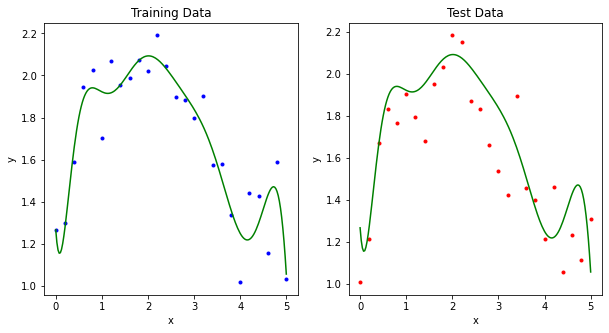

In [ ]:
fit_polynomial_and_plot()